In [107]:
import igraph as ig
import numpy as np
import pandas as pd
from IPython.core.display import display, SVG
import matplotlib.pyplot as plt
import umap.umap_ as umap

In [108]:
## jupyter nbconvert Jupyter\ Slides.ipynb --to slides --post serve
## To install this package with conda run one of the following:
##conda install -c conda-forge python-igraph 
##conda install -c conda-forge/label/gcc7 python-igraph 
##conda install -c conda-forge/label/cf201901 python-igraph 

In [109]:
def readGraph(fn, directed=False):
    g = ig.Graph.Read_Ncol(fn+'.edgelist',directed=directed)
    c = np.loadtxt(fn+'.community',dtype='uint8')
    node_base = min([int(x['name']) for x in g.vs]) ## graphs have 1-based or 0-based nodes 
    comm_base = min(c) ## same for communities
    comm = [c[int(x['name'])-node_base]-comm_base for x in g.vs]
    g.vs['community'] = comm
    g.vs['shape'] = 'circle'
    pal = ig.RainbowPalette(n=max(comm)+1)
    g.vs['color'] = [pal.get(int(i)) for i in comm]
    g.vs['size'] = 10
    g.es['width'] = 1
    return g

## LFR15

A synthetic graph with 100 nodes, 7 communities and 15% edges between communities.



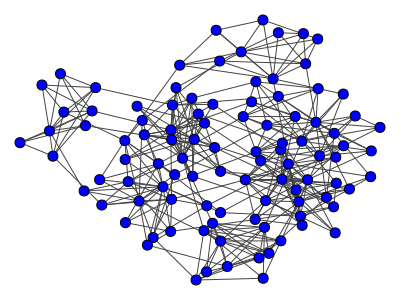

In [110]:
## Load the graph
g = readGraph('Data/LFR15/lfr15')
g.vs['color'] = 'blue'

## pick a layout function
ly = g.layout("kk")  ## kamada-kawai; usually nice
#ly = g.layout("mds") ## multi dimensional scaling
#ly = g.layout("fr")   ## Fruchterman-Reingold
#ly = g.layout("circle")
#ly = g.layout("random")

## Plot
ig.plot(g, layout=ly, bbox=(0,0,400,300))


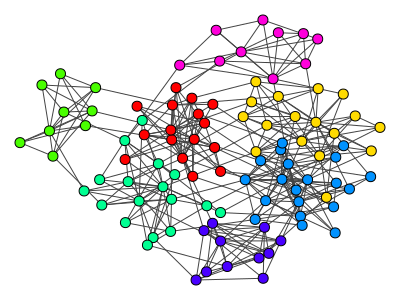

In [111]:
## Ground-truth communities are indicated with colours
g = readGraph('Data/LFR15/lfr15')
ig.plot(g, layout=ly, bbox=(0,0,400,300))


In [112]:
## Illustration: sampling, distances, embedding
fig, ax = plt.subplots(figsize=(8,6))
E = pd.read_csv('Data/LFR15/lfr15-embedding--verse-32-0',sep=' ',skiprows=1,
                header=None)
cl = [g.vs.find(str(x))['color'] for x in E.iloc[:,0]]
Y = umap.UMAP().fit_transform(E.iloc[:,1:])
ax.scatter(Y[:,0],Y[:,1],c=cl,marker="o", picker=True);


In [113]:
E.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,1,-0.177781,0.556232,-0.328218,0.061373,-0.277478,0.071546,-0.023142,0.514925,-0.375777,...,0.412158,0.665696,-0.460851,-0.091228,-0.042240,0.110758,0.369003,0.041830,-0.021632,0.408705
1,2,0.281935,0.381806,0.010947,-0.666604,-0.203769,-0.015489,0.103876,0.902000,0.846604,...,-0.374630,0.417709,-0.005734,0.127821,0.589378,-0.094860,0.428575,0.196534,0.486142,0.621216
2,3,0.157529,0.083342,-0.283064,0.083647,0.060081,0.319569,0.115887,0.673641,-0.503788,...,-0.250288,-0.338453,-0.538667,0.844794,-0.493193,-0.274693,-0.371217,-0.442875,-0.106360,0.332185
3,4,-0.251360,-0.717067,0.729433,-0.189615,0.480346,-0.033287,-0.161265,0.251332,-0.256467,...,-0.764752,-0.048785,0.011316,0.330146,-0.321047,-0.271029,0.500165,-0.520050,-0.379815,0.251432
4,5,-0.320593,0.127733,-0.703398,0.815125,0.554101,-0.274312,-0.376964,0.160907,-0.392910,...,0.159178,0.837851,-0.343665,-0.043226,0.488604,-0.199251,0.582114,-0.045102,0.030565,-0.175073


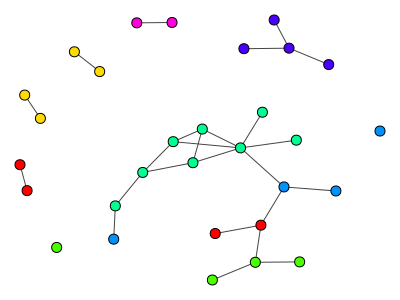

In [114]:
s = np.random.choice(100,30,replace=False)
sg = g.subgraph(s)
ig.plot(sg, bbox=(0,0,400,300))

In [115]:
print('Diameters: ',g.diameter(),sg.diameter())
print('Avg degrees: ',np.mean(g.degree()),np.mean(sg.degree()))
print('Avg distances: ',np.mean(g.shortest_paths_dijkstra()),np.mean(sg.shortest_paths_dijkstra()))

Diameters:  6 8
Avg degrees:  7.28 1.6666666666666667
Avg distances:  2.8712 inf


In [116]:
from scipy.spatial.distance import pdist
print('Mean and stdv of distance in vector space:',np.mean(pdist(E.iloc[:, 1:])),np.std(pdist(E.iloc[:, 1:])))
print('Mean and stdv of distance in sampled vector space:',np.mean(pdist(E.iloc[s, 1:])),np.std(pdist(E.iloc[s, 1:])))


Mean and stdv of distance in vector space: 2.9238643087966354 0.44175036338689416
Mean and stdv of distance in sampled vector space: 2.976498345207734 0.4351641492039028


In [117]:
fig, ax = plt.subplots(figsize=(8,6))
cls = [cl[i] for i in s]
ax.scatter(Y[s,0],Y[s,1],c=cls,marker="o", picker=True);


## LFR35

A synthetic graph with 100 nodes, 9 communities and 35% edges between communities.

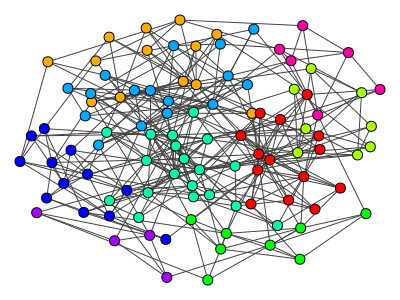

In [118]:
g = readGraph('Data/LFR35/lfr35')
ly = g.layout("kk")
ig.plot(g, layout=ly, bbox=(0,0,400,300))


## LFR55

A synthetic graph with 100 nodes, 9 communities and 55% edges between communities.

This is very noisy.


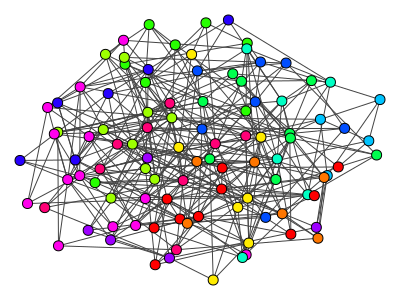

In [119]:
g = readGraph('Data/LFR55/lfr55')
ly = g.layout("kk")
ig.plot(g, layout=ly, bbox=(0,0,400,300))


In [120]:
## College Football Graph
g = readGraph('Data/Football/football')

## Show 'Independent' and 'Sun Belt' as triangles
## 5 Independent play in other conferences (green)
## 7 Sun Belt are broken in 2 (pink)
## 3 other teams play in other conference
g.vs['shape'] = 'circle'
for v in g.vs:
    if v['community'] in [5,10]:
        v['shape']='triangle'
    if v['name'] in ['28','58','110']:
        v['shape']='square'


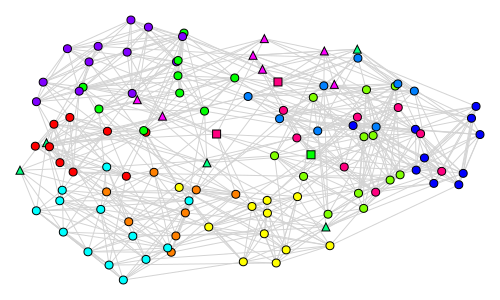

In [121]:
ly = g.layout("kk")
ig.plot(g, layout=ly, bbox=(0,0,500,300), vertex_size=8, edge_color='lightgray')


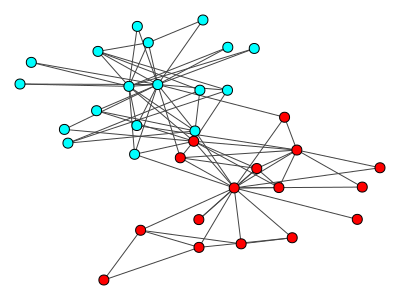

In [122]:
g = readGraph('Data/Karate/karate')
ly = g.layout("kk")
ig.plot(g, layout=ly, bbox=(0,0,400,300))

In [123]:
## degree distribution
n, bins, patches = plt.hist(x=g.degree(), bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Degree distribution');


In [124]:
## coreness distribution
n, bins, patches = plt.hist(x=g.coreness(), bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Coreness distribution');


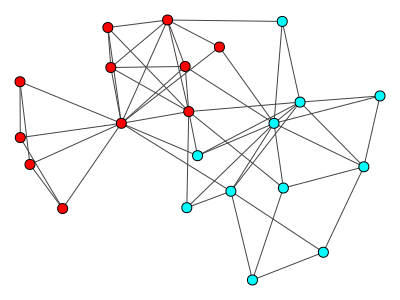

In [125]:
## 3-core 
g.vs['core']=g.coreness()
v = [x for x in g.vs if x['core']>2]
sg = g.subgraph(v)
ig.plot(sg, bbox=(0,0,400,300))

In [126]:
print('diameters:',g.diameter(),sg.diameter()) ## longest shortest path
print('edge connectivity:',g.adhesion(),sg.adhesion()) ## min n_edges to cut graph 
print('average path length:',g.average_path_length(),sg.average_path_length())

diameters: 5 4
edge connectivity: 1 3
average path length: 2.409982174688057 2.064935064935065


## Centrality

In [127]:
def setSize(x, lo=8, hi=20):
    s = [np.round(lo+(hi-lo)*(i-min(x))/max(x)) for i in x]
    return s

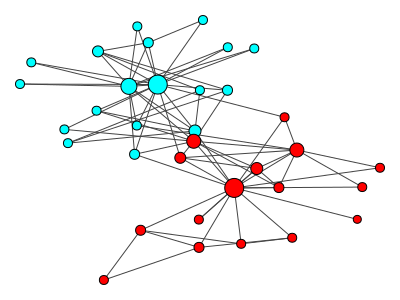

In [128]:
## degree
g.vs['size'] = setSize(g.degree())
ig.plot(g, layout=ly, bbox=(0,0,400,300), vertex_label_size=0 )

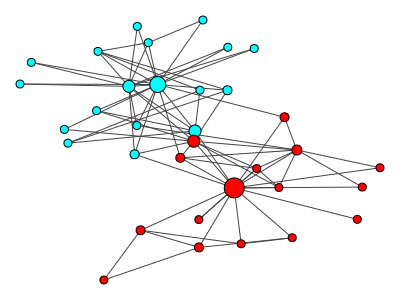

In [129]:
## betweenness
g.vs['size'] = setSize(g.betweenness(directed=False))
ig.plot(g, layout=ly, bbox=(0,0,400,300), vertex_label_size=0 )

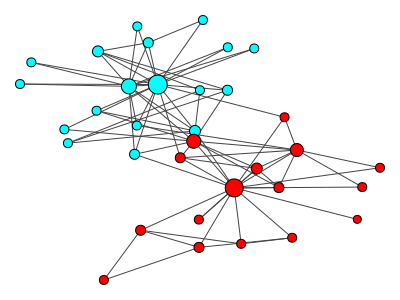

In [130]:
# pagerank()
g.vs['size'] = setSize(g.pagerank(directed=False))
ig.plot(g, layout=ly, bbox=(0,0,400,300), vertex_label_size=7 )

In [131]:
def efficiency(g):
    n = g.vcount()
    s = 0
    for i in range(n-1):
        v = g.get_shortest_paths(i)
        s += np.sum([1/len(x) for x in v[i+1:] if len(x)>0])
    return s/(n*(n-1))

def deltaCentrality(g):
    n = g.vcount()
    dc = []
    eff = efficiency(g)
    for i in range(n):
        G = g.copy()
        el = g.incident(i)
        G.delete_edges(el)
        dc.append((eff-efficiency(G))/eff)
    return dc

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: Couldn't reach some vertices at src/paths/unweighted.c:368
  """


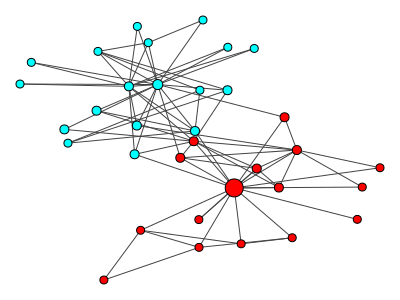

In [132]:
# delta (warning due to some node removal disconnecting the graph)
g.vs['size'] = setSize(deltaCentrality(g))
ig.plot(g, layout=ly, bbox=(0,0,400,300), vertex_label_size=0 )

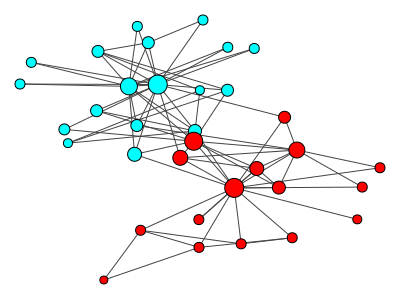

In [133]:
x = g.evcent() ## eigenvector centrality
g.vs['size'] = setSize(x)
ig.plot(g, layout=ly, bbox=(0,0,400,300), vertex_label_size=0 )

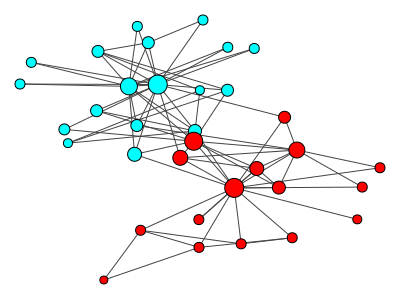

In [134]:
x = g.authority_score() ## hub/authority scores (same for undirected graphs)
g.vs['size'] = setSize(x)
ig.plot(g, layout=ly, bbox=(0,0,400,300), vertex_label_size=0 )

In [135]:
D = pd.DataFrame({'label':g.vs['name'],'eigencentrality':g.evcent(), 'degree':g.degree(),\
                 'betweenness':g.betweenness(),'closeness':g.closeness(), 'delta':deltaCentrality(g),\
                 'pagerank':g.pagerank(), 'authority':g.authority_score()})

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: Couldn't reach some vertices at src/paths/unweighted.c:368
  """


In [136]:
D.sort_values(by='degree', ascending=False)

,label,eigencentrality,degree,betweenness,closeness,delta,pagerank,authority
23,34,1.000000,17,161.051587,0.550000,0.104730,0.102417,1.000000
0,1,0.979777,16,231.071429,0.568966,0.328729,0.097894,0.979777
19,33,0.820526,12,77.357143,0.515625,0.073301,0.072918,0.820526
15,3,0.866265,10,76.017460,0.559322,0.083545,0.057805,0.866265
16,2,0.725962,9,32.478571,0.485294,0.070106,0.053668,0.725962
14,4,0.586753,6,6.454762,0.464789,0.062494,0.036185,0.586753
1,32,0.522795,6,73.009524,0.540984,0.077195,0.037497,0.522795
29,24,0.407773,5,9.300000,0.392857,0.058359,0.031829,0.407773
5,14,0.624656,5,24.215873,0.515625,0.066065,0.029842,0.624656
21,28,0.365291,4,11.792063,0.458333,0.061742,0.025867,0.365291


In [137]:
D.corr('kendall')

,eigencentrality,degree,betweenness,closeness,delta,pagerank,authority
eigencentrality,1.000000,0.629545,0.550514,0.677213,0.781908,0.495972,0.991015
degree,0.629545,1.000000,0.797356,0.766135,0.722775,0.915811,0.635253
betweenness,0.550514,0.797356,1.000000,0.767896,0.721719,0.699722,0.555505
closeness,0.677213,0.766135,0.767896,1.000000,0.908413,0.604542,0.683353
delta,0.781908,0.722775,0.721719,0.908413,1.000000,0.570499,0.788997
pagerank,0.495972,0.915811,0.699722,0.604542,0.570499,1.000000,0.504082
authority,0.991015,0.635253,0.555505,0.683353,0.788997,0.504082,1.000000


## Edge betweenness

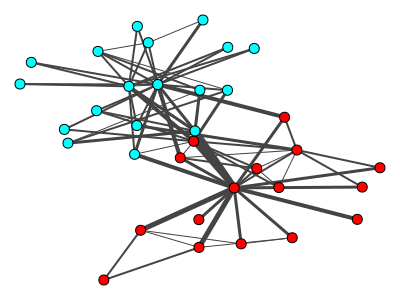

In [138]:
g.es['width'] = setSize(g.es.edge_betweenness(),1,7)
g.vs['size'] = 10
ig.plot(g, layout=ly, bbox=(0,0,400,300))

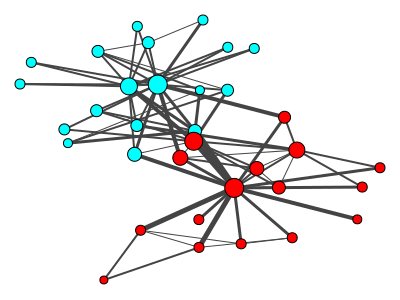

In [139]:
g.es['width'] = setSize(g.es.edge_betweenness(),1,7)
g.vs['size'] = setSize(g.evcent())
ig.plot(g, layout=ly, bbox=(0,0,400,300))

## Assortativity

In [140]:
## negative mu here: hubs connect to low degree nodes
g.assortativity_degree()

-0.49416650869422823

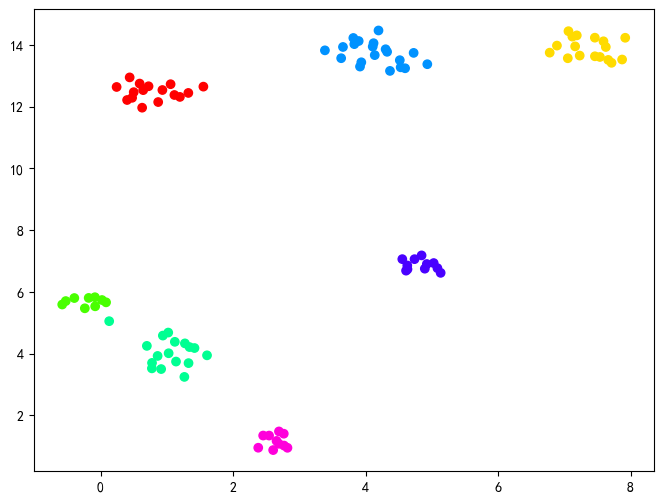

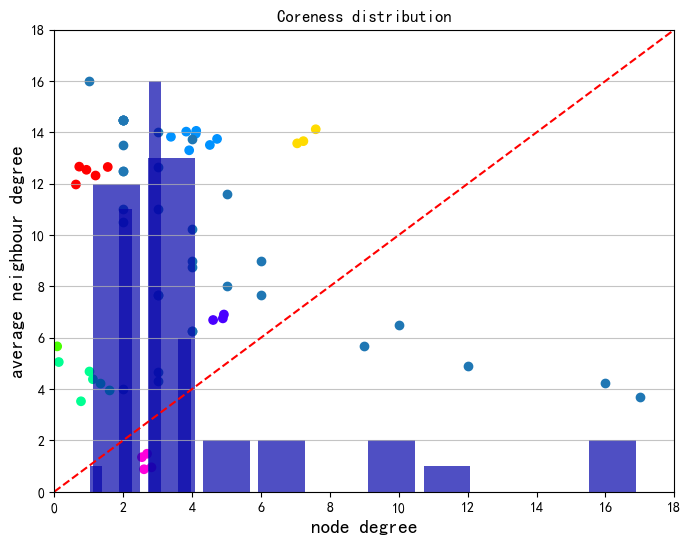

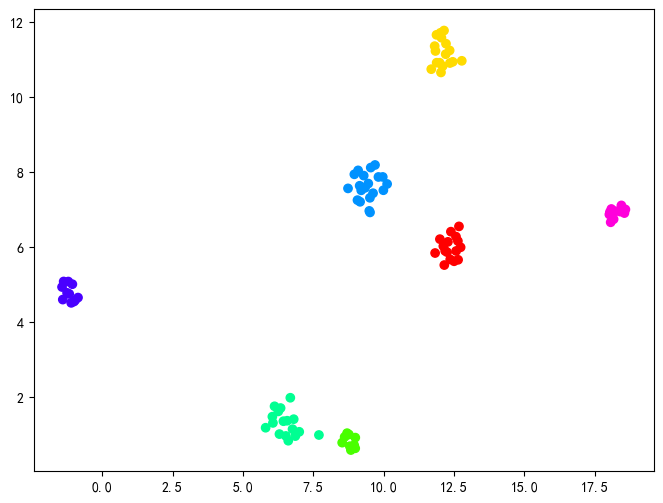

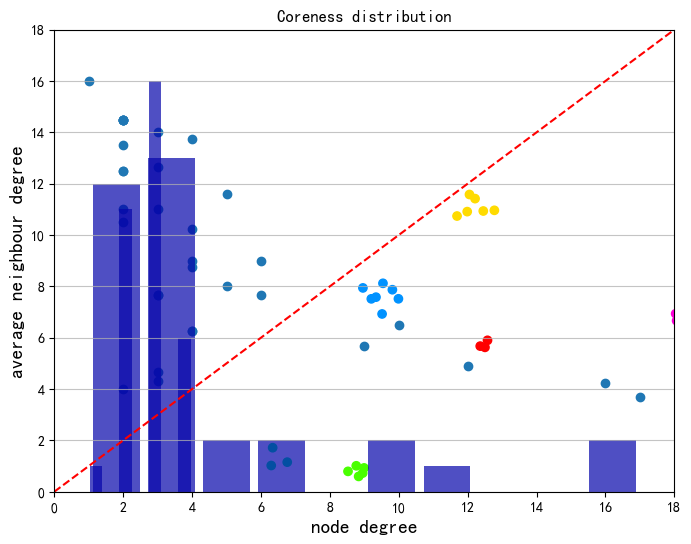

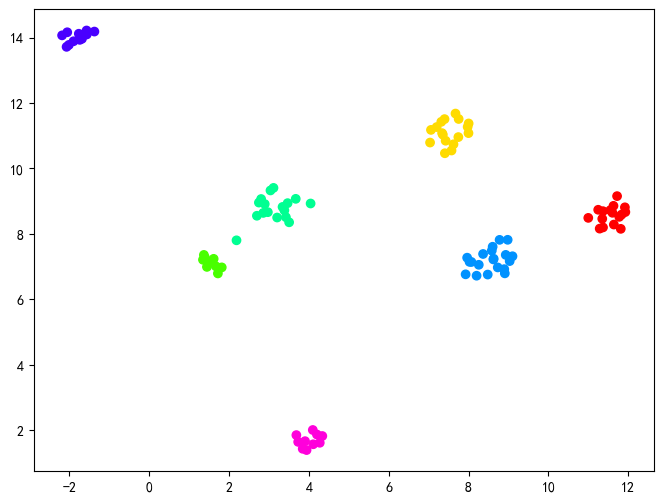

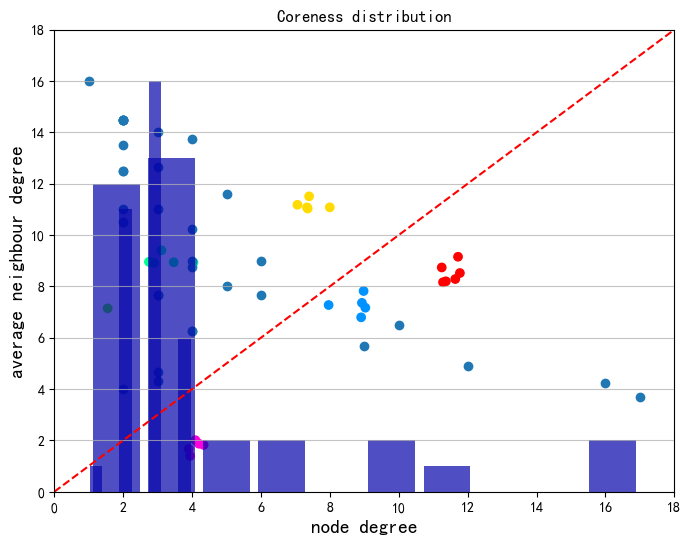

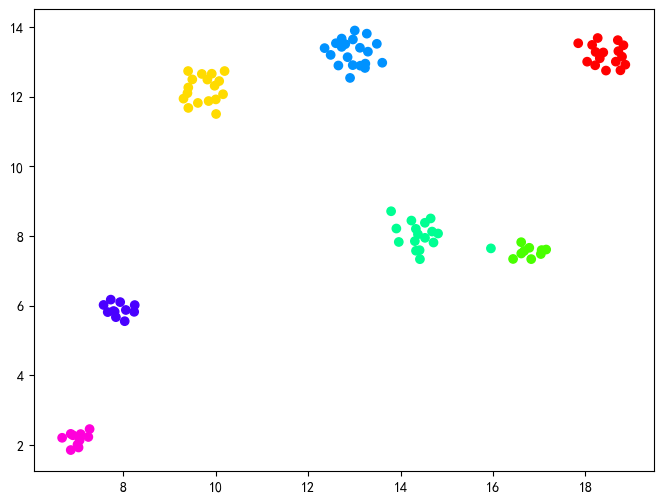

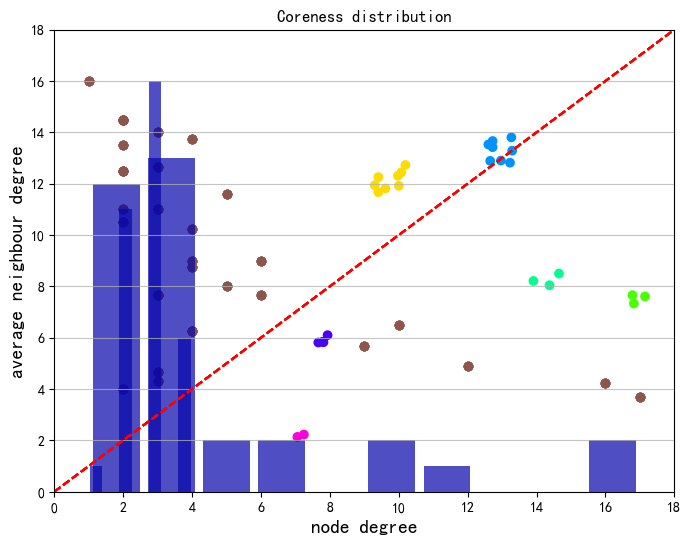

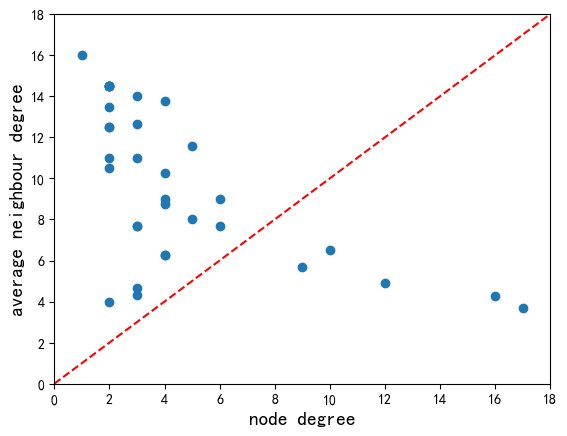

In [147]:
## plot degree vs avg neighbour degree
## friendship 'paradox'

deg = [v.degree() for v in g.vs()]
nad = []
for v in g.vs():
    nv = g.neighbors(v)
    nad.append(np.mean([deg[i] for i in nv]))

plt.scatter(deg,nad)
plt.xlim((0,18))
plt.ylim((0,18))
plt.xlabel('node degree', fontsize=14)
plt.ylabel('average neighbour degree', fontsize=14)
plt.plot([0,18],[0,18],'--', c='r')
plt.show()